In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from tensorflow import keras

In [33]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [34]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


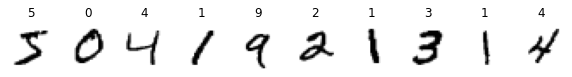

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].set_title(train_target[i])
    axs[i].axis('off')
plt.show()

In [36]:
# 2차행렬로 변환
train_input = train_input.reshape(-1, 28 * 28)
test_input = test_input.reshape(-1, 28 * 28)

In [38]:
import numpy as np
# train_target의 종류 및 개수 파악
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [39]:
# Train data를 train data와 검증 data로 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
  train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
train_scaled = train_scaled / 255.0
val_scaled = val_scaled / 255.0

In [40]:
dense = keras.layers.Dense(units=10, activation='softmax', input_shape = (784,)) # 출력층만 만드는 것
model = keras.Sequential(dense)

In [41]:
# 손실함수
model.compile(
  loss='sparse_categorical_crossentropy',
  metrics='accuracy'
)

In [42]:
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4647 - accuracy: 0.8775 - val_loss: 0.3202 - val_accuracy: 0.9112
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.9132 - val_loss: 0.2974 - val_accuracy: 0.9182
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.9188 - val_loss: 0.2905 - val_accuracy: 0.9195
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2850 - accuracy: 0.9225 - val_loss: 0.2901 - val_accuracy: 0.9210
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9243 - val_loss: 0.2904 - val_accuracy: 0.9217
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.9251 - val_loss: 0.2961 - val_accuracy: 0.9231
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9266 - val_loss: 0.2939 - val_accuracy: